In [42]:
import numpy as np
import numpy.linalg as linalg

Vamos gerar amostras aleatórias, seguindo a lei normal e à custa de uma matriz de covariância dada para o efeito.

In [43]:
mu_vec = np.array([0,0])
cov_mat = np.array([[1,0.8],[0.8,1]])
amostra = np.random.multivariate_normal(mu_vec, cov_mat, 500).T

In [44]:
%pylab inline
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Visualização dos dados:

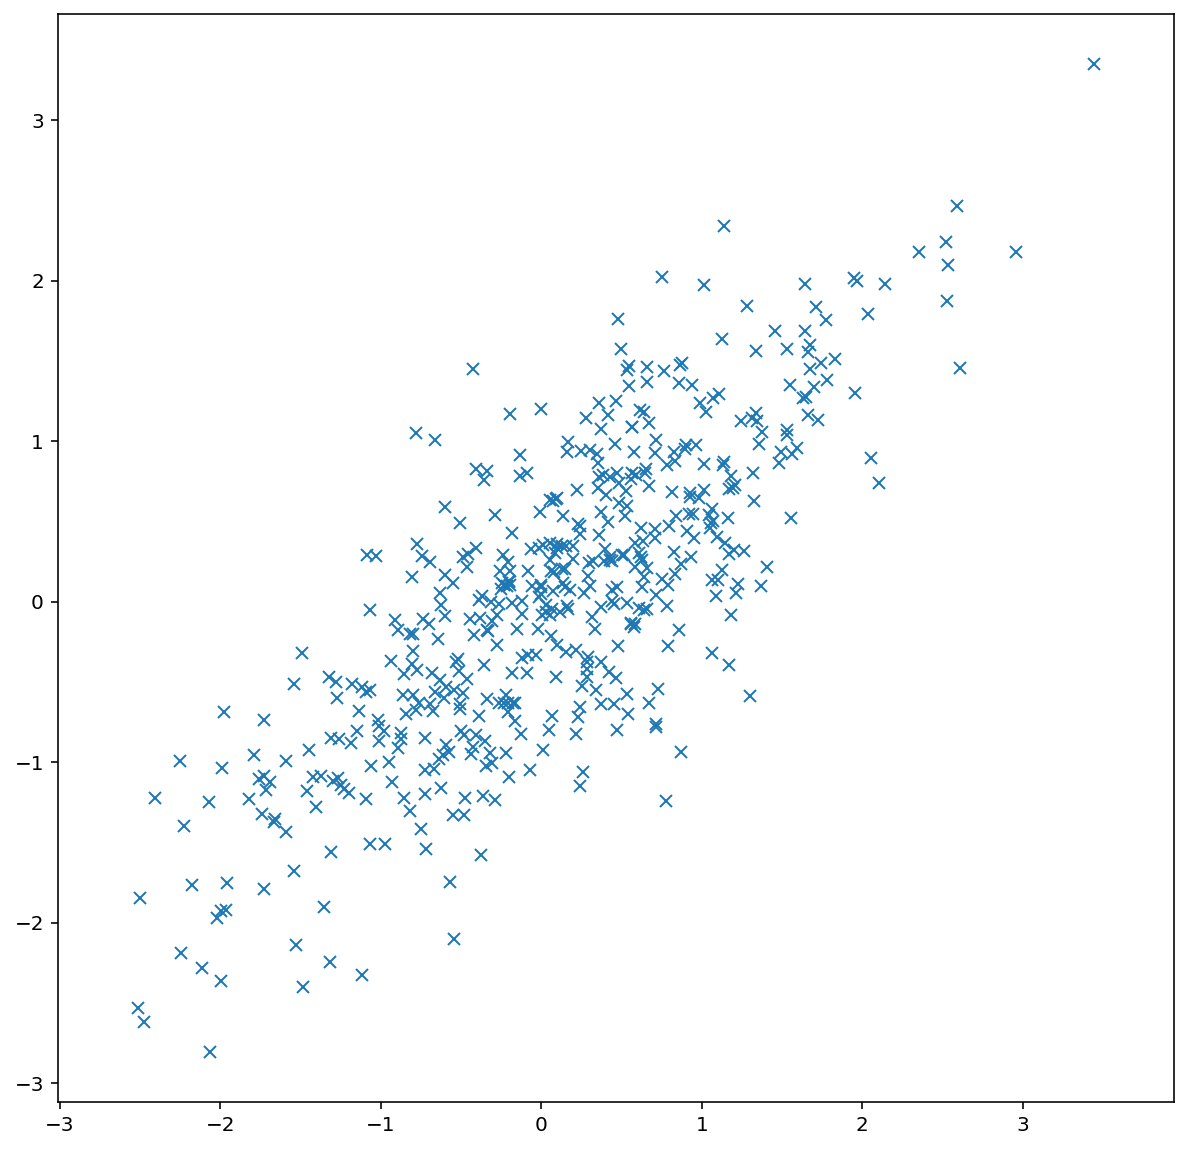

In [45]:
plt.figure(figsize=(10,10))
plt.plot(amostra[0], amostra[1], 'x')
plt.axis('equal')
plt.show()

Note-se que apesar de se ter gerado aleatoriamente amostras centradas em (0,0), a média amostral pode não ser (0,0)!

In [46]:
print(amostra.shape)
media_x = np.mean(amostra[0,:])
media_y = np.mean(amostra[1,:])
print(media_x)
print(media_y)

(2, 500)
0.07727218606378028
0.032694715692628454


In [47]:
vector_media = np.array([[media_x],[media_y]])

In [48]:
vector_media

array([[0.07727219],
       [0.03269472]])

Vamos agora "re-centrar" os dados e calcular a matriz de dispersão, scatter matrix:

In [50]:
scatter_matrix = np.zeros((2,2))
print((amostra[:,5]).reshape(2,1))
for i in range(amostra.shape[1]):
    scatter_matrix += (amostra[:,i].reshape(2,1) - vector_media).dot((amostra[:,i].reshape(2,1) - vector_media).T)
print('Scatter Matrix:\n', scatter_matrix)
#Esta não é a matriz de covariancia, é a outra

[[-0.40781729]
 [ 0.33680176]]
Scatter Matrix:
 [[499.508275   380.18791303]
 [380.18791303 459.55830868]]


Comparemos os valores próprios da matriz de dispersão e de covariância, e os respectivos vectores próprios. Note que temos que calcular a matriz de covariância relativa à amostra!

In [51]:
mat_cov = np.cov([amostra[0,:],amostra[1,:]])

In [52]:
print('Matriz de covariância:\n', cov_mat)
print('Matriz de covariância amostral:\n', mat_cov)
print('Matriz de dispersão:\n', mat_cov*amostra.shape[1])

Matriz de covariância:
 [[1.  0.8]
 [0.8 1. ]]
Matriz de covariância amostral:
 [[1.00101859 0.76189963]
 [0.76189963 0.92095853]]
Matriz de dispersão:
 [[500.50929359 380.94981266]
 [380.94981266 460.47926722]]


In [53]:
# vectores e valores proprios da scatter matrix 
valprop_sc, vect_prop_sc = np.linalg.eig(scatter_matrix)

# vectores e valores proprios da matriz covariancia (amostral)
valprop_cov, vect_prop_cov = np.linalg.eig(mat_cov)


In [54]:
valprop_sc

array([860.24558369,  98.82099999])

In [55]:
valprop_cov

array([1.72393905, 0.19803808])

Infelizmente os valores próprios não são apresentados por ordem...
https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.eig.html

In [56]:
idx = valprop_sc.argsort()[::-1]
valprop_sc = valprop_sc[idx]
vect_prop_sc = vect_prop_sc[:,idx]

In [57]:
valprop_sc

array([860.24558369,  98.82099999])

In [58]:
vect_prop_sc

array([[ 0.72541967, -0.68830684],
       [ 0.68830684,  0.72541967]])

Façamos o mesmo para a matriz de covariância:

In [59]:
idx = valprop_cov.argsort()[::-1]
valprop_cov = valprop_cov[idx]
vect_prop_cov = vect_prop_cov[:,idx]

In [60]:
vect_prop_cov

array([[ 0.72541967, -0.68830684],
       [ 0.68830684,  0.72541967]])

In [61]:
vect_prop_sc

array([[ 0.72541967, -0.68830684],
       [ 0.68830684,  0.72541967]])

In [62]:
print(np.trace(amostra))

0.1322010994331891


Tal como previsto, têm os mesmos vectores próprios de norma igual a 1. E sobre os valores próprios, a razão é $n-1$ onde $n$ é o tamanho da amostra.

In [63]:
valprop_sc[0]/valprop_cov[0], valprop_sc[1]/valprop_cov[1]

(499.0, 498.99999999999864)

Como é de esperar, a soma dos valores próprios de cada uma das matrizes, que iguala o traço (soma dos elementos diagonais) da respectiva matriz, terão a mesma razão.

In [64]:
traco_cov=np.trace(mat_cov)
traco_sc=np.trace(scatter_matrix)
traco_sc/traco_cov

498.99999999999994

Para estudo de grandeza de algum dos valores próprios em relação aos restantes (neste caso em particular só temos 2 valores proprios), vamos ver qual a razão entre o maior valor próprio (ou os maiores), em relação à soma de todos os valores próprios (que iguala o traço). Como vimos, e tratando-se de uma razão, é irrelevante usar a matriz de covariância ou a de dispersão scatter_matrix.

In [65]:
valprop_cov[0]/traco_cov

0.8969612728989503

Cerca de 90% da informação está "contida" na direcção do vector próprio associado ao maior valor próprio. Ou seja, aparenta ser boa ideia reduzir de 2 para 1 dimensão.

In [66]:
w=vect_prop_sc[:,0]
w

array([0.72541967, 0.68830684])

In [67]:
norm(w)

1.0

In [68]:
declive=w[1]/w[0]

In [69]:
declive

0.9488394983852112

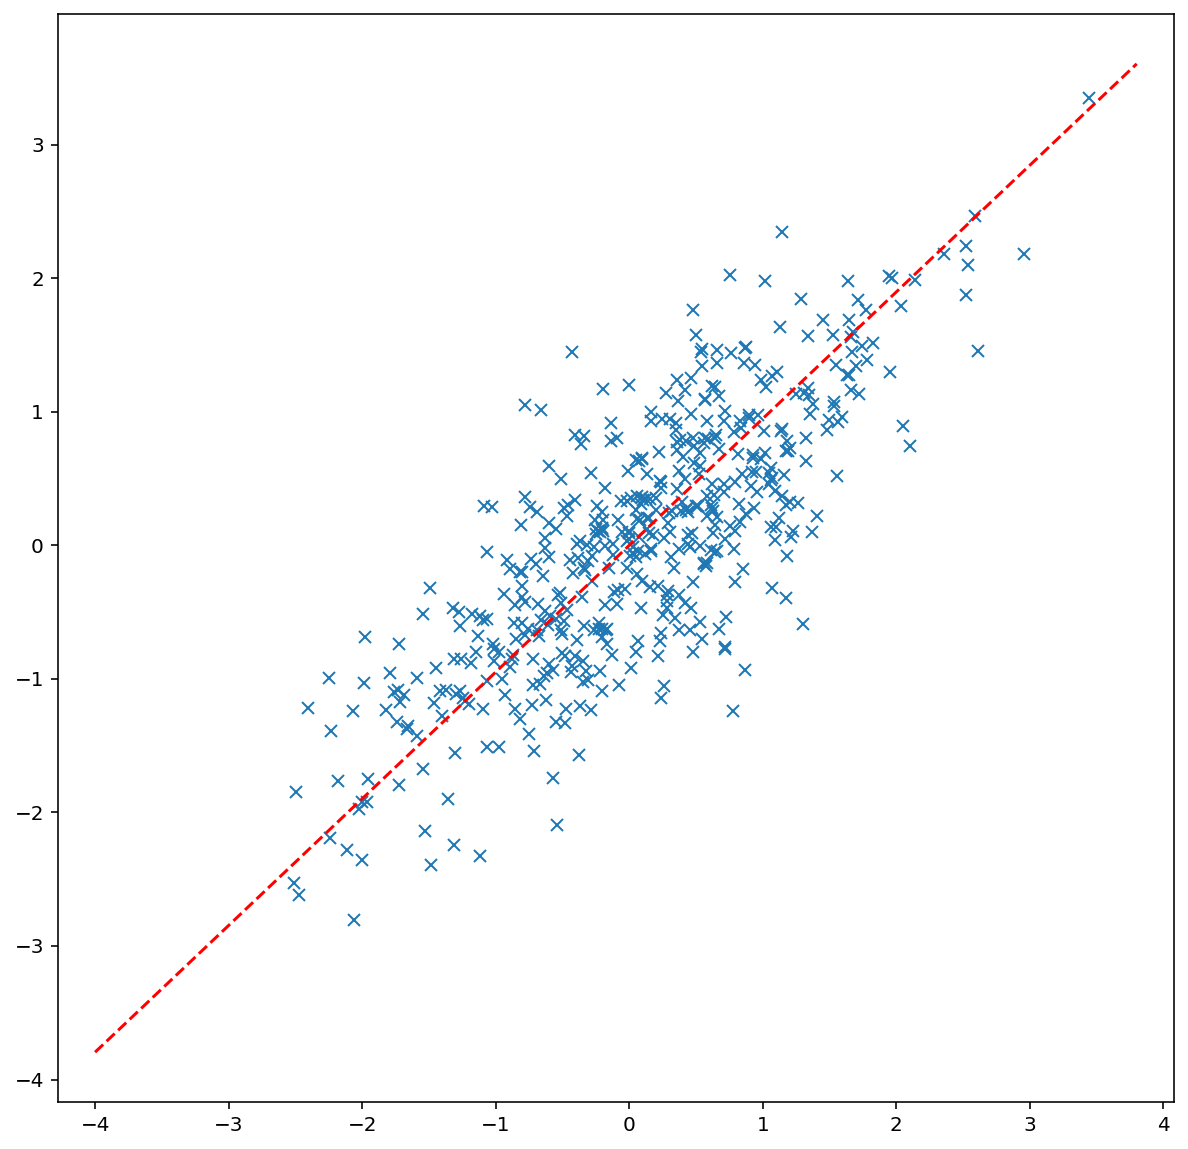

In [70]:
plt.figure(figsize=(10,10))
plt.plot(amostra[0], amostra[1], 'x')
t = np.arange(-4, 4, 0.2)
plt.plot(t, declive*t, 'r--')
plt.axis('equal')
plt.show()

Resta-nos fazer a projecção de cada elemento no espaço gerado por $w$, vector próprio da matriz associado ao maior valor próprio.

In [71]:
amostraT=amostra.T

In [72]:
amostraT.shape

(500, 2)

In [73]:
prod_inter=amostraT.dot(w)
print(prod_inter.shape)

(500,)


O vector prod_inter contém os productos internos das amostras com o vector $w$.

In [74]:
amostra_proj=numpy.zeros(shape=(2,len(amostra[1])))

In [75]:
for i in range(len(amostra[1])):
    amostra_proj[:,i]=prod_inter[i]*w;
    
print(prod_inter[0]*w)

[0.05244741 0.04976417]


Construímos a matriz amostra_proj que cujas colunas são as projecções das respectivas amostras em $< w >$.

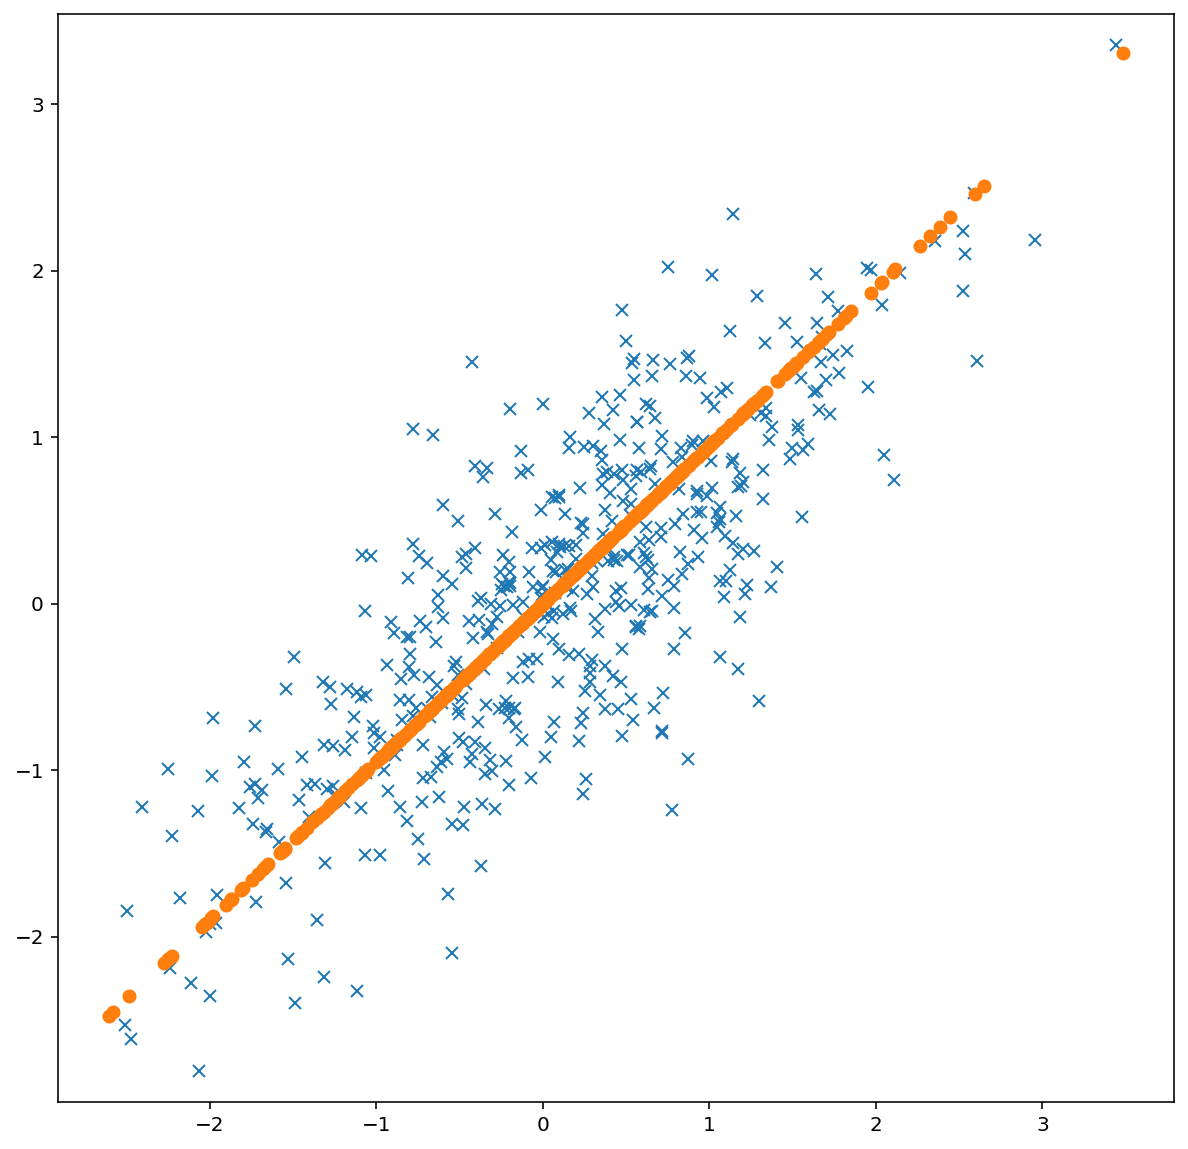

In [76]:
plt.figure(figsize=(10,10))
plt.plot(amostra[0], amostra[1], 'x')
plt.plot(amostra_proj[0], amostra_proj[1], 'o')
plt.axis('equal')
plt.show()

Façamos agora um exercício que mostre que nem sempre é possível (ou aconselhável) aplicar o PCA. Neste caso, não existe uma direcção para a qual a variância seja maior.

In [77]:
mu_vec = np.array([0,0])
cov_mat = np.array([[1,0],[0,1]])
amostra = np.random.multivariate_normal(mu_vec, cov_mat, 500).T

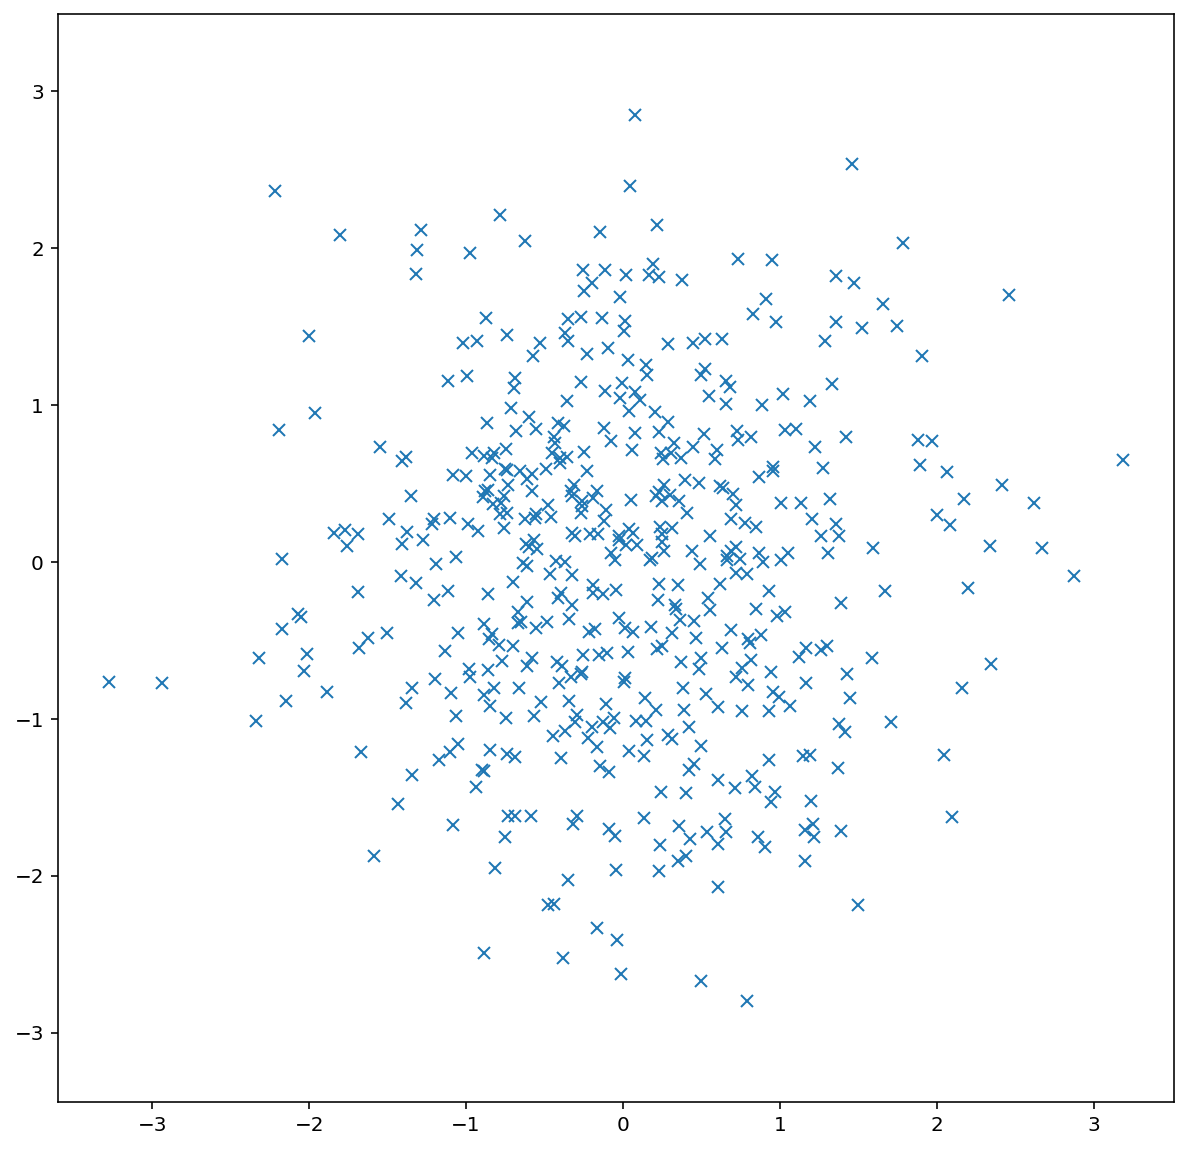

In [78]:
plt.figure(figsize=(10,10))
plt.plot(amostra[0], amostra[1], 'x')
plt.axis('equal')
plt.show()

In [79]:
mat_cov = np.cov([amostra[0,:],amostra[1,:]])

In [80]:
valprop_cov, _ = np.linalg.eig(mat_cov)

In [81]:
idx = valprop_cov.argsort()[::-1]
valprop_cov = valprop_cov[idx]

In [82]:
valprop_cov

array([1.10426129, 0.95991453])

In [83]:
traco_cov=np.trace(mat_cov)
valprop_cov[0]/traco_cov

0.5349647436083659